In [3]:
# Importations nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalisation des pixels [0, 255] → [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Redimensionnement pour CNN (ajout du canal)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# One-hot encoding des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Text(0, 0.5, "Nombre d'images")

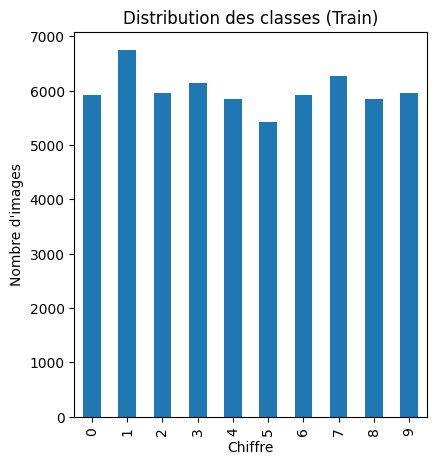

In [8]:
# Visualisation de la distribution des classes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')
plt.title('Distribution des classes (Train)')
plt.xlabel('Chiffre')
plt.ylabel('Nombre d\'images')

C:\Users\ABDELKARIM\AppData\Local\Temp\ipykernel_4768\1439027238.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


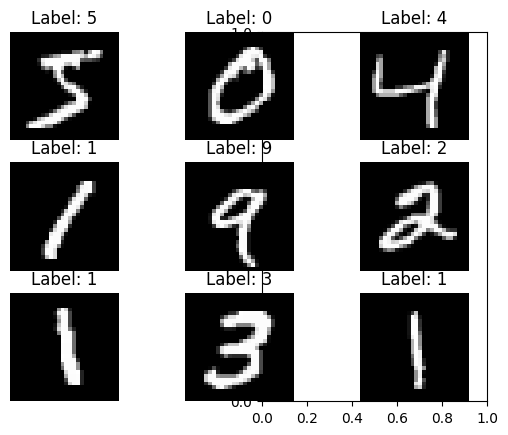

In [9]:
# Affichage d'un échantillon d'images
plt.subplot(1, 2, 2)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
# Nouvelle architecture avec des filtres plus petits
model = Sequential()

In [12]:
# Couche 1: Conv 3x3 + ReLU + Pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

C:\Users\ABDELKARIM\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Couche 2: Conv 3x3 + ReLU + Pooling  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [14]:
# Couche 3: Conv 3x3 + ReLU + Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [15]:
# Flatten pour les couches fully-connected
model.add(Flatten())

In [16]:
# Couche 4: Fully-connected + ReLU
model.add(Dense(100, activation='relu'))

In [17]:
# Couche 5: Output + Softmax
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,254 (247.09 KB)

 Trainable params: 63,254 (247.09 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Entraînement
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 248s 324ms/step - accuracy: 0.9086 - loss: 0.2960 - val_accuracy: 0.9667 - val_loss: 0.1090
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 283s 352ms/step - accuracy: 0.9707 - loss: 0.0937 - val_accuracy: 0.9747 - val_loss: 0.0842
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 314s 342ms/step - accuracy: 0.9804 - loss: 0.0652 - val_accuracy: 0.9809 - val_loss: 0.0628
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 251s 326ms/step - accuracy: 0.9835 - loss: 0.0525 - val_accuracy: 0.9783 - val_loss: 0.0727
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 269s 335ms/step - accuracy: 0.9867 - loss: 0.0434 - val_accuracy: 0.9825 - val_loss: 0.0607
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 275s 367ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9851 - val_loss: 0.0513
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 313s 355ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9863 - val_loss: 0.0489
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 295s 319ms/step - accuracy: 0.9915 -

Text(0.5, 1.0, 'Loss')

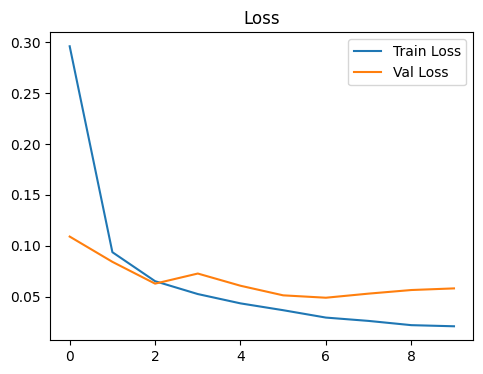

In [21]:
# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

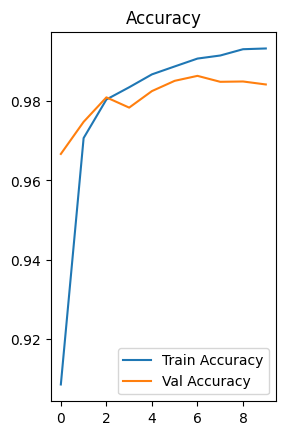

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [23]:
# Évaluation sur le test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


Test accuracy: 0.9846
Test loss: 0.0586


In [24]:
# Prédictions sur quelques images de test
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


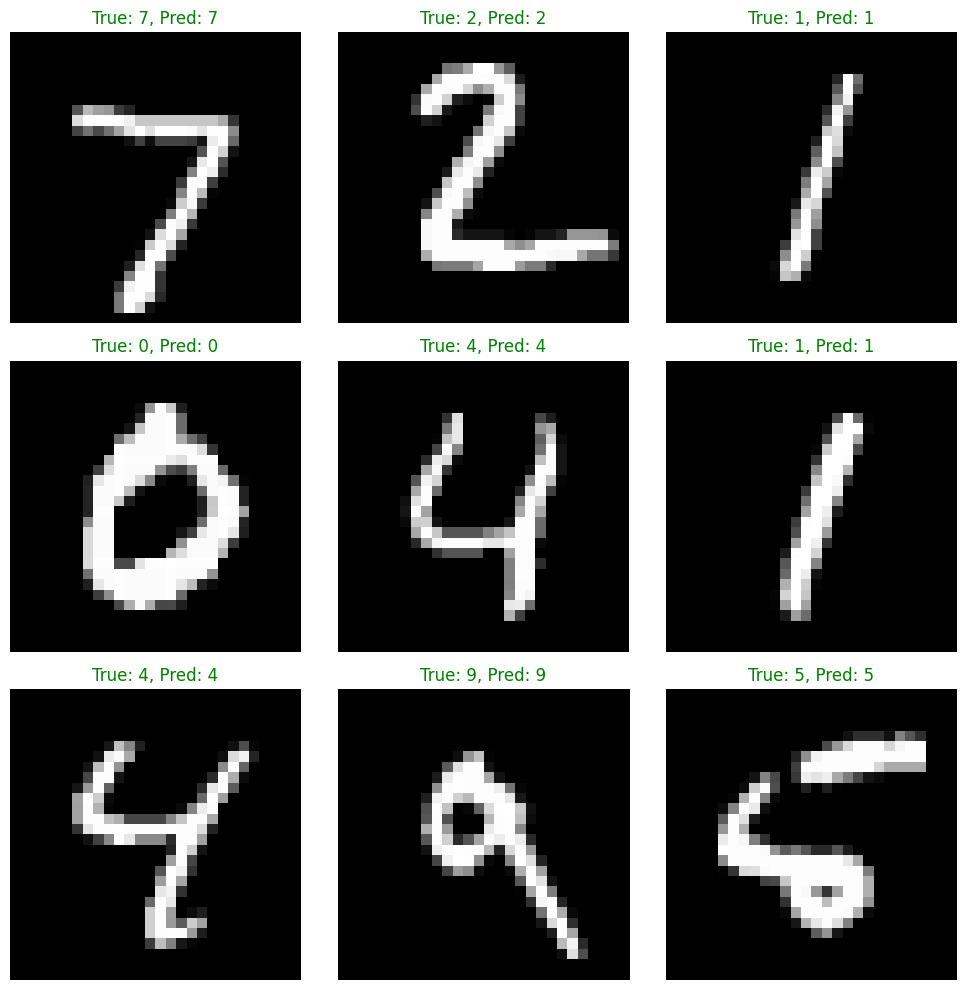

In [25]:
# Visualisation des prédictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f'True: {true_label}, Pred: {predicted_label}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()